# Dimensionality Reduction

This chapter combines contents from Raschka, chapter 5, and Geron, chapter 8.

The __curse of dimensionality__: the more features (=dimensions) the training data has, the more likely we are to overfit the data. Given a constant number of training samples, the predictive performance first tends to increase with the availability of more features, but at some point it decreases as the number of dimensions increases further.

We will consider several methods for dimensionality reduction via __feature extraction__, i.e., the extraction of a smaller number of informative features from high-dimensional data.

## Projection

Projection methods take data from a high-dimensional space and project it to a lower-dimensional subspace, while attempting to preserve much of the information contained in the original data.

E.g., while the samples in the figure below correspond to points in a three-dimensional space, those points are all very close to a two-dimensional subspace represented by the plane.

<center>

<img src="images/dataset_3d_plot.png" align="center" width="800" />
</center>

If we project the data perpendicularly to the plane, as shown below, we reduce the dimensionality while losing very little information.

<center>

<img src="images/dataset_2d_plot.png" align="center" width="800" />
</center>

While projection methods are often useful, there are data sets that are less suited for such approaches. An example for such a data set is what is known as the Swiss roll, shown below.
<center>

<img src="images/swiss_roll_plot.png" align="center" width="800" />
</center>

We would rather unroll the roll than project the data into a two-dimensional space. This is also apparent from the next figure, showing the projection on the left and the unrolled Swiss roll on the right.

<center>

<img src="images/squished_swiss_roll_plot.png" align="center" width="1200" />
</center>

## Manifold Learning

The Swiss roll is a two-dimensional __manifold__, i.e., a 2D shape that can be part of a higher-dimensional space while locally resembling a 2D plane.

As an alternative to projection techniques, there are those relying on the __manifold hypothesis__, i.e., the assumption that the samples in a high-dimensional data set tend to be close to a lower-dimensional manifold. Of course, if we use a manifold learning approach, we assume that it makes the task simpler than using the original data, which will often be the case. 

The figures below show that this assumption is not always fulfilled: it is true in the example on top but not in that at the bottom.
<table width = 100%>
    <tr>
        <td><img src="images/manifold_decision_boundary_plot3.png"/></td>
        <td><img src="images/manifold_decision_boundary_plot4.png"/></td>
    </tr>
    <tr>
        <td><img src="images/manifold_decision_boundary_plot1.png"/></td>
        <td><img src="images/manifold_decision_boundary_plot2.png"/></td>
    </tr>
</table>

In [1]:
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import MDS, Isomap, TSNE


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Principal Component Analysis (PCA)

Principal component analysis (PCA) is an unsupervised method for dimensionality reduction via projection. PCA identifies orthogonal axes in the high-dimensional space that explain most of the variance of the original data. The unit vectors representing those axes are called principal components. The high-dimensional data is then projected onto a k-dimensional sub-vectorspace of the original one, spanned by the k principal components that contribute most to explaining the variance in the training data.

The figure below illustrates the principal components in a two-dimensional space. It shows three "candidate" directions in the scatterplot on the left, and the positions of the samples when projected onto those directions on the right. The projection onto the solid line preserves most of the variance. Thus, it represents the first principal component. The direction of the dotted line is orthogonal to the solid line. It represents the second principal component.

<center>

<img src="images/pca_best_projection_plot.png" align="center" width="1200" />
</center>

To determine the principal components, we apply a method called __Singular Value Decomposition (SVD)__ that decomposes the data into the product of three matrices
\begin{align}
\mathbf{X}=\mathbf{U}\Sigma V^T
\end{align}
where each row of $\mathbf{V}$ contains one principal component, from the first to the last according to their contribution to the variance of $\mathbf{X}$.

We can then project data of dimension $d$ onto their first $k$ principal components by taking a transformation matrix $\mathbf{W_k}$ of dimension $d\times k$ that contains the first $k$ principal components. The training data $\mathbf{X}$ is then mapped to a lower-dimensional matrix $\mathbf{Z}$:

\begin{align}
\mathbf{XW_k}=\mathbf{Z}
\end{align}

## PCA in scikit-learn

`sklearn` provides the class `PCA`. The method `fit` computes the principal components, the method `transform` performs the projection of the data. Note that `PCA` does not automatically standardize the data. It is generally advisable to perform a standardization before a PCA unless all features have a similar variance.

To demonstrate PCA, we first construct a random data set.

In [2]:
np.random.seed(4)
n = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(n) * 3 * np.pi / 2 - 0.5
X = np.empty((n, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(n) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(n) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(n)

In this example, we transform data by projecting it to the first two principal components.

In [3]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [4]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

The method `inverse_transform` attempts to invert the previous transformation, though it cannot perfectly recreate the higher-dimensional data set because of the information loss incurred when projecting the data onto the 2D-space.

In [5]:
X3D_inv = pca.inverse_transform(X2D)

In [6]:
X[:5], X3D_inv[:5]

(array([[-1.01570027, -0.55091331, -0.26132626],
        [-0.00771675,  0.59958572,  0.03507755],
        [-0.95317135, -0.46453691, -0.24920288],
        [-0.92012304,  0.21009593,  0.02182381],
        [-0.76309739,  0.158261  ,  0.19152496]]),
 array([[-1.01450604, -0.54656333, -0.27441525],
        [-0.02103231,  0.55108376,  0.18101894],
        [-0.95379477, -0.4668077 , -0.24237013],
        [-0.91717404,  0.22083765, -0.01049779],
        [-0.74607229,  0.22027492,  0.00492637]]))

The attribute `components_` contains the principal components.

In [7]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

The attribute `explained_variance_ratio_` contains the contribution of each principal component to the explanation of the variance in the original data.

In [8]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

We can also use this attribute to see how much of the variance is lost because of the projection onto the lower-dimensional space.

In [9]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

## How many principal components should we use?

Unless the only purpose of using PCA is data visualization, the choice of the number of components used  should depend on the data.

E.g., we may decide that the reduced data should explain at least a certain percentage of the variance. The following code accomplishes that task, using a different, higher-dimensional data set than the one we considered before.

In [10]:
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

C:\Users\Westheide\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [11]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [12]:
d

154

In [13]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)

Instead of taking the multiple steps above, we can get the same result by using a float between 0 and 1 as the value of the argument `n_components` when creating the `PCA` object.

In [14]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [15]:
pca.n_components_

154

In [16]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557439

Another approach is to visually inspect the data to see where there is an "elbow" where the explained variance begins to grow more slowly.

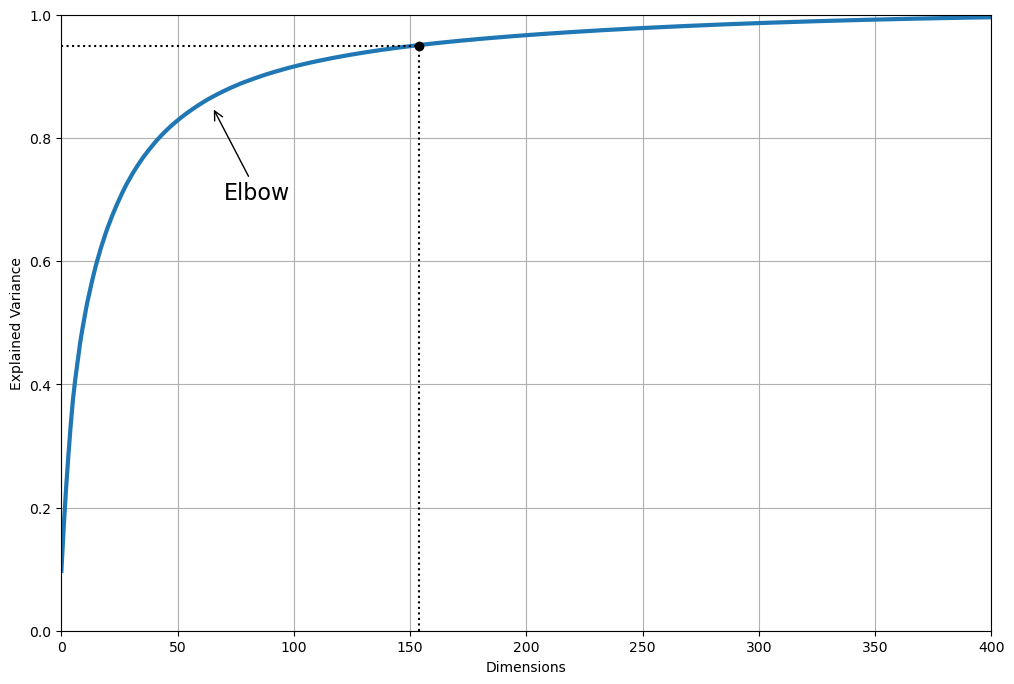

In [17]:
plt.figure(figsize=(12,8))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

## Incremental PCA

If the data set is so large that it cannot be read into the computer's memory, the classical PCA, which requires computations on the whole data, cannot be performed.

The `IncrementalPCA` is an alternative that uses mini-batches of the data to approximately compute the principal components.

One way to use `IncrementalPCA` is to explicitly loop over the mini-batches and use the `partial_fit` method. Afterwards, we can `transform` the data based on the learned principal components.

In [18]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

Alternatively, we can directly use `fit_transform`.

In [19]:
batch_size=int(y_train.size/100)
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
X_reduced = inc_pca.fit_transform(X)

## Randomized PCA

Another alternative when the training data is very large is to choose only a random subset of the data to compute the principal components.

scikit-learn's class `PCA` does this automatically dependent on the numbers of samples and features. However, it is also possible to choose randomization by setting the argument `svd_solver="randomize"`. The resulting principal components will not be identical but close to those calculated based on the whole training data.

In [20]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

# Locally Linear Embedding (LLE)

Locally Linear Embedding (LLE) is a Manifold Learning method. It is useful for nonlinear dimensionality reduction.

The idea is to measure how each sample from the training data relates to its nearest neighbors, and to then create a lower-dimensional representation of the data that retains the local relationships. Thus, it is especially useful if the data is close to a twisted manifold, such as the Swiss roll, as it unrolls the manifold.

LLE determines the $k$ nearest neighbors of each training sample $\mathbf{x}^{(i)}$ and attempts to express $\mathbf{x}^{(i)}$ as a linear combination of those neighbors, i.e., it determines a weight matrix $\mathbf{\hat{W}}$ such that

\begin{align}
\mathbf{\hat{W}}=\text{argmin}_{\mathbf{W}}\sum_{i=1}^n\lVert\mathbf{x}^{(i)}-\sum_{j=1}^nw_{i,j}\mathbf{x}^{(j)}\rVert^2
\end{align}

subject to
$\begin{cases}
w_{i,j}=0\text{ if }\mathbf{x}^j\text{ is not among the }k\text{ nearest neighbors of }\mathbf{x}^i\\
\sum_{j=1}^nw_{i,j}=1\text{for }i=1,2,\dots,n
\end{cases}$

Then LLE maps the data to a lower-dimensional subspace that retains the local relationships expressed by $\mathbf{\hat{W}}$ to the greatest possible extent. Formally, this amounts to solving the following optimization problem, where $\mathbf{\hat{Z}}$ is the matrix representing the transformed training sample in the lower-dimensional subspace.

\begin{align}
\mathbf{\hat{Z}}=\text{argmin}_{\mathbf{Z}}\sum_{i=1}^n\lVert\mathbf{z}^{(i)}-\sum_{j=1}^n\hat{w}_{i,j}\mathbf{z}^{(j)}\rVert^2
\end{align}

LLE is implemented in `sklearn` in the class `LocallyLinearEmbedding`. Note that the complexity of the algorithm is quadratic in the number of samples, which makes the approach less useful for very large data sets.

We will apply it to the Swiss roll and reduce the dimensionality from three to two via the parameter `n_components=2`. Another relevant parameter we set is `n_neighbors` which determines how many nearby samples to consider with respect to the local linear relationships.

In [21]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

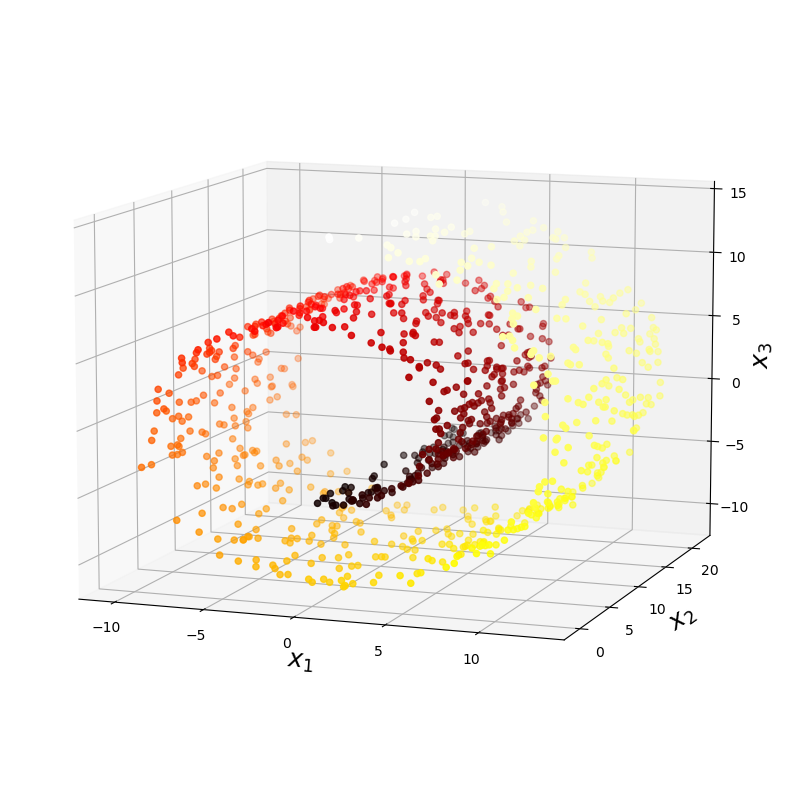

In [22]:
axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

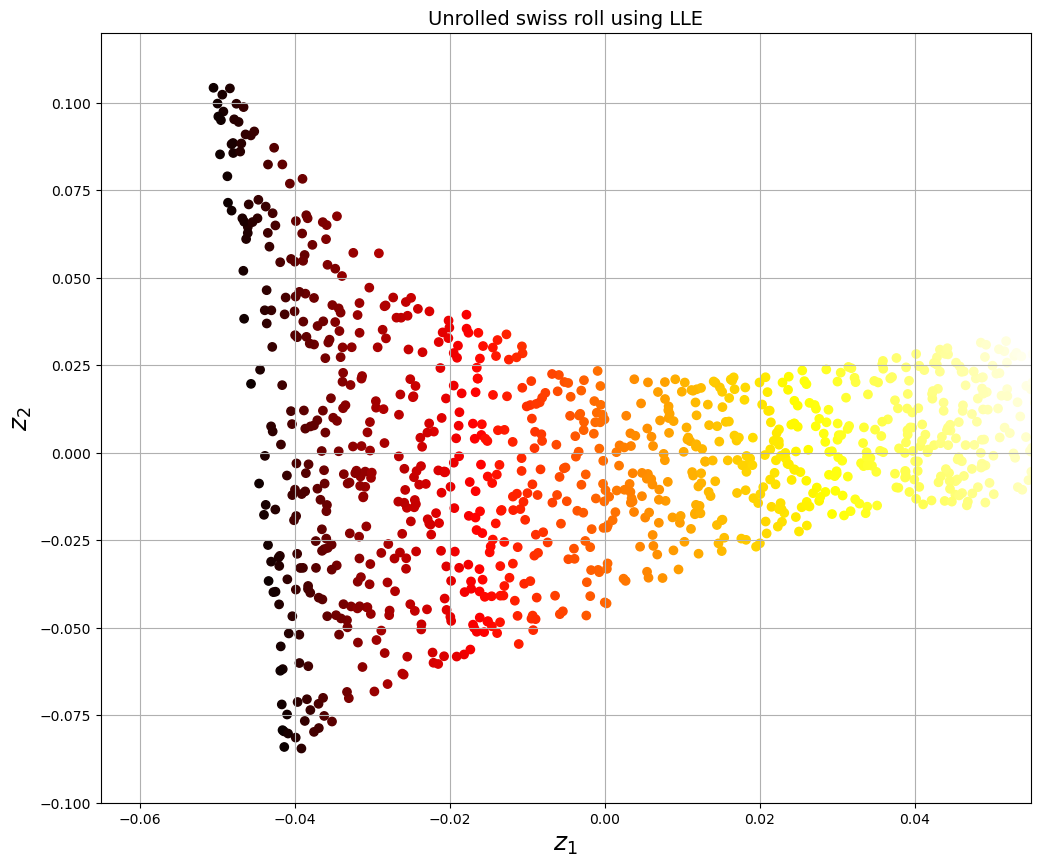

In [23]:
fig = plt.figure(figsize=(12, 10))
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

# Multidimensional Scaling (MDS), Isomap, and t-Distributed Stochastic Neighbor Embedding (t-SNE)

A very brief overview of some other techniques available in `sklearn`.

__Multidimensional Scaling (MDS)__ attempts to preserve the distances between training samples.

In [24]:
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

C:\Users\Westheide\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


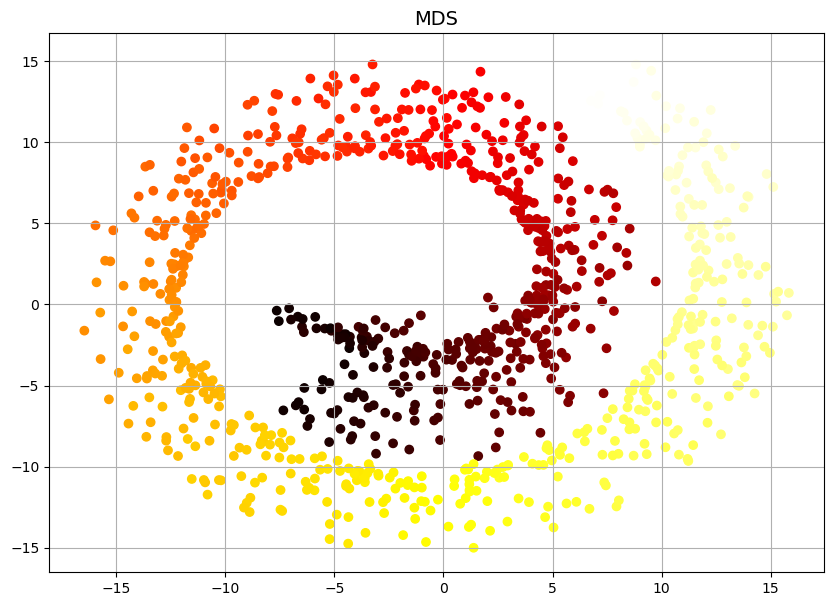

In [25]:
plt.figure(figsize=(10,7))
plt.title("MDS", fontsize=14)
plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()

__Isomap__ computes a graph connecting samples to their nearest neighbors and attempts to preserve geodesic distances, defined as the number of nodes on the shortest path between two nodes in a graph, between samples.

In [26]:
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

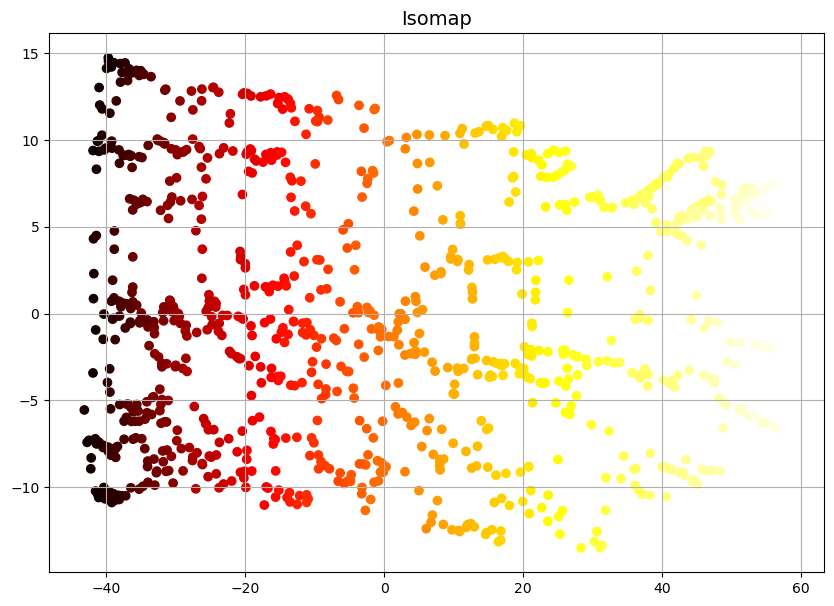

In [27]:
plt.figure(figsize=(10,7))
plt.title("Isomap", fontsize=14)
plt.scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()

__t-Distributed Stochastic Neighbor Embedding (t-SNE)__ attempts to keep similar samples close to each other, and dissimilar samples distant from one another. It is predominantly useful for visualization purposes as it allows the visualization of clusters of samples.

In [28]:
tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate=200)
X_reduced_tsne = tsne.fit_transform(X)

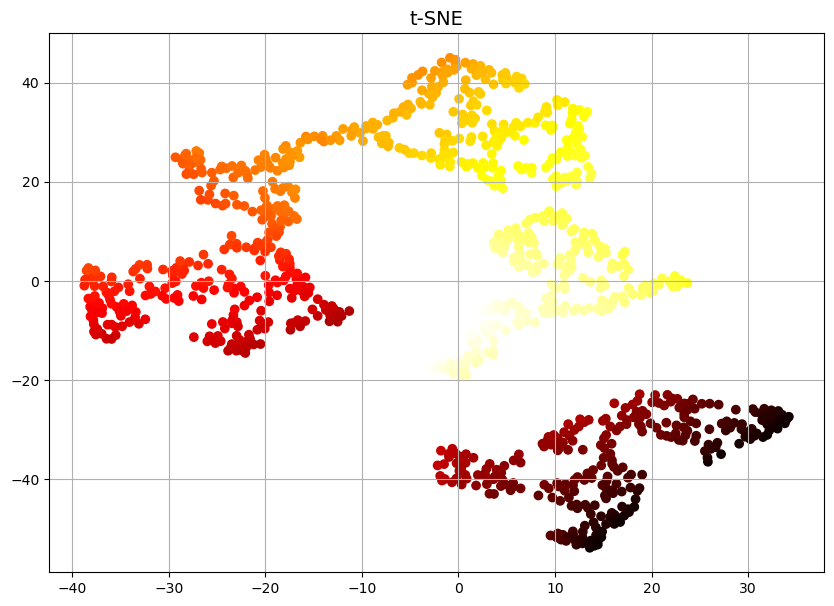

In [29]:
plt.figure(figsize=(10,7))
plt.title("t-SNE", fontsize=14)
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()